# Benvenuti!
Questo è un Notebook in Python.

E' composto da *celle*, alcune di testo (come questa) e altre di codice (in linguaggio Python), cioè comandi per il computer.

Per far partire i comandi in una cella ("eseguirli", come diciamo noi), potete cliccare sulla cella e poi premere contemporaneamente sulla tastiera il tasto Shift (cioè freccia in su sopra al pulsante "Ctrl") e il tasto Invio. Oppure potete cliccare col mouse direttamente sul simbolo "Play" a sinistra della cella.

Provate ad *eseguire* la prossima cella:

In [12]:
#il codice è esattamente Python
print("Hai eseguito la cella!")

Hai eseguito la cella!


La cella ha stampato una riga di testo. In generale però si vede che la cella è stata eseguita anche dalla spunta verde che compare al suo fianco. Più avanti può esserti comodo controllare quali celle hai già eseguito osservando la spunta verde.

Per ora ti consigliamo di non modificare quel che trovi nelle celle di codice, ma **eseguirle soltanto**, cercando di capire che succede.

Poi potrai tornare indietro e modificarne alcuni pezzi per vedere come cambiano i risultati. Vi indicheremo nel testo dove potrebbe essere interessante modificare qualcosa.

Ci saranno delle **celle "nascoste"**: potete cliccarci sopra per vedere il codice che c'è dietro o lasciarle nascoste, in ogni caso non vi preoccupate se non capite bene cosa sta facendo.

E' importante **eseguire le celle in ordine**, senza saltarne nessuna, altrimenti il computer si lamenterà e darà dei messaggi di errore. Se succede, non vi preoccupate: basterà andare a ricontrollare cosa avete saltato ed eseguirlo e poi riprovare la cella che ha dato errore. Non c'è niente che potete davvero rompere qui dentro. E se avete bisogno di aiuto, chiamateci!

# Compito: aspettativa di vita nei paesi del mondo

Immaginate di essere parte dell'Organizzazione Mondiale della Sanità e di voler capire quali sono i fattori che influenzano l'aspettativa di vita (Life expectancy) nelle varie nazioni.

Che il Prodotto Interno Lordo (PIL o GDP in inglese) del paese conti qualcosa? O che conti il numero di anni di scuola che si fanno mediamente in quel paese? O che sia importante principalmente quanto sono presenti malattie come AIDS/HIV, Epatite e difterite? O magari sarà il tasso di sottopeso nei bambini tra i 5 e i 9 anni l'indicatore più importante per prevedere se in un certo contesto prevediamo un'aspettativa di vita lunga o corta?

Più probabilmente sarà un insieme di fattori a determinare la probabilità di vivere più o meno a lungo per le persone nate in un certo paese.

# Parte noiosa: procurarsi i dati!
Spesso questa è una delle parti più difficili della Data Science. Per fortuna, alcuni nostri colleghi hanno già raccolto dati per molti paesi e li hanno inseriti in una tabella. Quindi noi partiremo con dei dati già caricati: fate "play" della prossima cella per continuare.

Se siete curiosi, la fonte dei dati è https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data

In [13]:
# Qui diciamo al codice di "importare" alcuni "pacchetti" che poi useremo
# nei vari pacchetti si spiega cosa fare quando lanciamo i vari comandi che poi ci serviranno

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import os

import random
random.seed(42)

In [14]:
#qui gli diciamo dove sta il file che contiene i dati (è tipo un file excel)
#e glielo facciamo leggere e imparare
df = pd.read_csv("../data/LifeExpectancyData.csv")
df = df.drop_duplicates(subset='Country')
df.set_index('Country', inplace=True, drop=True)
df.drop('Year', inplace=True, axis=1)
df.drop(' thinness  1-19 years', inplace=True, axis=1)
df.drop('infant deaths', inplace=True, axis=1)
df.drop('Income composition of resources', inplace=True, axis=1)
df.drop('percentage expenditure', inplace=True, axis=1)
df.drop('Adult Mortality', inplace=True, axis=1)
df=df.fillna(df.mean(numeric_only=True))
str_columns = df.select_dtypes(include=['object'])

# Apply one-hot encoding to these columns
df = pd.get_dummies(df, columns=str_columns.columns)

# Vediamo i dati!
Abbiamo immagazzinato i nostri dati in una tabella (nel linguaggio in codice, nello specifico, in un *dataframe*, quindi chiameremo questa tabella "df").

Le righe contengono i paesi, e le colonne delle caratteristiche (*features*) per ogni paese. 

In [15]:
print(df.columns)
df

Index(['Life expectancy ', 'Alcohol', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness 5-9 years', 'Schooling',
       'Status_Developed', 'Status_Developing'],
      dtype='object')


,Life expectancy,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 5-9 years,Schooling,Status_Developed,Status_Developing
Country,,,,,,,,,,,,,,,,
Afghanistan,65.0,0.01,65.0,1154,19.1,83,6.0,8.160000,65.0,0.1,584.259210,3.373649e+07,17.3,10.1,False,True
Albania,77.8,4.60,99.0,0,58.0,0,99.0,6.000000,99.0,0.1,3954.227830,2.887300e+04,1.3,14.2,False,True
Algeria,75.6,2.69,95.0,63,59.5,24,95.0,7.935833,95.0,0.1,4132.762920,3.987153e+07,5.8,14.4,False,True
Angola,52.4,2.69,64.0,118,23.3,98,7.0,7.935833,64.0,1.9,3695.793748,2.785935e+06,8.2,11.4,False,True
Antigua and Barbuda,76.4,2.69,99.0,0,47.7,0,86.0,7.935833,99.0,0.2,13566.954100,1.094329e+07,3.3,13.9,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),74.1,2.69,87.0,0,62.1,10,87.0,7.935833,87.0,0.1,7021.962512,1.094329e+07,1.5,14.3,False,True
Viet Nam,76.0,2.69,97.0,256,17.5,35,97.0,7.935833,97.0,0.1,7021.962512,1.094329e+07,14.5,12.6,False,True
Yemen,65.7,2.69,69.0,468,41.3,47,63.0,7.935833,69.0,0.1,7021.962512,1.094329e+07,13.4,9.0,False,True


# Predire l'aspettativa di vita nei paesi del mondo


Ci interessa capire quali fattori influenzano l'aspettativa di vita in un paese.

Possiamo immaginare che le caratteristiche nelle colonne qui sopra contribuiscano positivamente o negativamente all'aspettativa di vita, ma non sappiamo in che modo: questo è quello che vogliamo *imparare dai dati*. Lo faremo attraverso quello che chiamiamo un *modello*, che ha lo scopo di "predire" la quantità che studiamo (l'aspettativa di vita) partendo dalle altre caratteristiche.

Più preciso sarà il nostro modello, più accuratamente potremo predire l'aspettativa di vita in un paese conoscendo i fattori presenti nella tabella.

Per prima cosa, visto che predire l'aspettativa di vita usando come dato proprio l'aspettativa di vita sarebbe barare, la rimuoviamo dalle colonne della tabella e la mettiamo in una lista a parte, che chiamiamo y. Questa y ci serve sia per istruire il modello sia poi per valutare quanto quanto questo sarà bravo nelle sue previsioni. Premete play qui sotto.

In [16]:
# Definiamo y
y=df['Life expectancy ']
# Eliminiamo l'aspettativa di vita dalla tabella precedente
df.drop('Life expectancy ', inplace=True, axis=1)
# Invece X sarà il resto della tabella
X=df.copy()

Abbiamo 193 stati.
Se usassimo tutti gli stati per imparare la previsione che riteniamo più accurata, non avremmo nessun modo per sapere se il nostro modello funzioni anche su stati diversi o, ad esempio, sugli stessi stati ma tra 10 anni.
Dobbiamo quindi dividere questo insieme di dati in due gruppi, uno per "allenare" il modello (set di training) e l'altro per testare se sta funzionando bene e quanto bene funziona (set di test).

In [17]:
# Di solito si usano circa 3/4 dei dati a disposizione per allenare il modello
# abbiamo i dati per 193 stati -> i suoi tre quarti son circa 140
training_samples=140
# MODIFICABILE: per ora eseguite la cella lasciando così il numero di paesi usati per allenare
# alla fine potete tornare qui e decidere di cambiarlo per vedere cosa succede
# Se lo cambiate, dovrete poi eseguire di nuovo anche tutte le celle più sotto
# per vedere l'impatto che ha: non le ricalcola in automatico!

# Pre-processing
La prossima cella nascosta fa un po' di lavoro sporco: divide il dataset in set di training (allenamento) e set di test (verifica) mescolando gli stati casualmente, e "riscala" le variabili in modo che i loro valori siano comparabili. Queste operazioni fanno parte di un processo che si chiama "pre-processing" e che è molto utile per ottenere buoni risultati. Se chiedete in giro, però, scoprirete che anche questo non è molto divertente!

Se vuoi saperne di più, questo è il momento giusto per una domanda!

In [19]:
# Qui faccio delle divisioni in modo che tutti i valori stiano tra 0 e 1.
# Questo mi aiuterà poi per confrontare quale aspetto impatta di più sull'aspettativa di vita
X = X.astype(float)  
X= ((X - X.min()) / (X.max() - X.min()))

indexes = list(range(len(y)))
random.shuffle(indexes)

X=X.iloc[indexes]
y=y[indexes]

X_train=X[:training_samples]
X_test=X[training_samples:]
y_train=y[:training_samples]
y_test=y[training_samples:]


/tmp/ipykernel_1040/2216477467.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y=y[indexes]


# Introduciamo e alleniamo il modello
Finalmente facciamo quanto ci è stato commissionato: cercare di predire l'aspettativa di vita media nei diversi paesi partendo dai valori nelle altre colonne della tabella, e capire quali di esse sono più importanti in questa previsione.

Il modello che usiamo oggi si chiama **Regressione Lineare** e vuole prevedere l'aspettativa di vita di un paese partendo dagli altri dati che conosciamo per quel paese, ad esempio PIL o gli anni di scuola che si fanno in quel paese.

Questo modello prevede di calcolare l'aspettativa di vita in un paese  moltiplicando i valori nelle colonne della tabella (questi valori li chiameremo $x_1$, $x_2$, $x_n$ e sono ad esempio il PIL o gli anni di scuola) per dei numeri (che chiameremo *pesi* e indicheremo come $w_1$, $w_2$, $w_n$) e poi sommando tutto quanto. Di fatto è una media pesata:

$$y= w_1 * x_1 + w_2 * x_2 + ... + w_n * x_n$$



Facciamo un esempio diverso per capire cos'è questa media pesata: dovete fare un esame che certifichi il vostro livello di inglese. L'esame è composto da una parte di reading, una listening, una di writing e una di speaking, ma, per il voto finale, queste parti contano in modo diverso: il reading 40%, tutte le altre 20%. Per ottenere il vostro voto finale, quindi, non potete fare semplicemente la media tra i 4 voti, perché bisogna tenere conto che il reading vale di più: dovete calcolare la media pesata così:

$$voto=0,4*read+0,2*listen+0,2*write+0,2*speak$$

dove read, listen, write e speak sono i voti di quelle 4 parti, mentre 0,4 e i vari 0,2 sono quelli che sopra abbiamo chiamato "pesi", perché vi indicano quanto è importante (quanto "pesa") il pezzo che state sommando.

Ora torniamo al nostro caso dell'aspettativa di vita. Mentre per l'esame noi i "pesi" li conoscevamo in partenza, qui non abbiamo idea di quanto valgano e anzi, il punto è proprio quello di trovare quali pesi $w$ permettono di ottenere un risultato della somma (la $y$) più simile possibile all'aspettativa di vita misurata per davvero con la formula di prima:

$$y= w_1 * x_1 + w_2 * x_2 + ... + w_n * x_n$$

Ma attenzione, mentre i valori delle $x$ (il prodotto interno lordo, la presenza di HIV, ecc) e la y (l'aspettativa di vita) variano da stato a stato, i pesi che vogliamo trovare devono essere gli stessi per tutti gli stati! Infatti sarà impossibile fissarli e ottenere per tutti stati la previsione giusta e precisa... dovremo trovare i numeri che "sbagliano meno"... che ci danno una previsione "abbastanza buona". Il bello è che, se siamo abbastanza bravi, poi potremo usare questi stessi pesi per predire l'aspettativa di vita anche di altri paesi per cui abbiamo i dati, perché i pesi che troviamo saranno validi in generale!

Il computer sa fare questa "ottimizzazione" da solo, cioè trovare i pesi migliori, che prevedono delle aspettative di vita simili a quelle vere, usando i due comandi qui sotto: premete play!

In [20]:
# Model è la "nostra" LinearRegression
model=LinearRegression();
# Con la funzione fit, il modello "impara" da solo i pesi ottimali
model.fit(X_train,y_train);

Abbiamo detto che il nostro modello non può predire le aspettative in modo preciso, perché obblighiamo i "pesi" a essere uguali per tutti i paesi quindi non è abbastanza flessibile. Ma come capire quanto le aspettative di vita calcolate si discostano dalla realtà?

Una buona pratica è spesso quella di fare un grafico! In orizzontale abbiamo il valore vero dell'aspettativa di vita, quello che ci viene dato nella tabella; in verticale invece c'è il valore che il nostro modello prevede. Quindi, più i punti stanno vicini alla diagonale, più l'aspettativa vera e quella predetta si somigliano e migliore è la predizione!

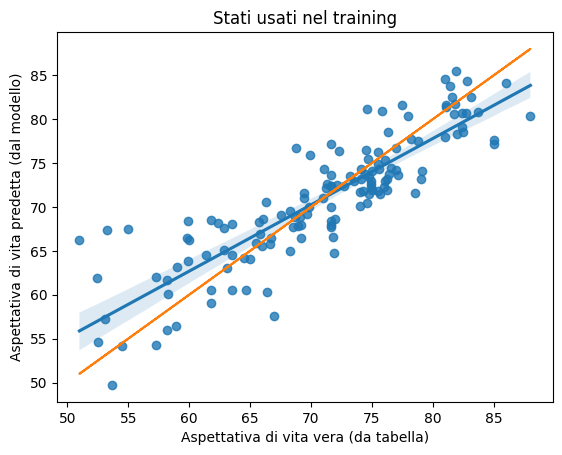

In [21]:
#calcolo l'aspettativa predetta per gli stati usati nel train
y_train_pred=model.predict(X_train)
#qui do i comandi per fare il grafico (plt somiglia all'inglese plot, cioè graficare)
sns.regplot(x=y_train, y=y_train_pred).set(title='Stati usati nel training')
plt.plot(y_train, y_train)
ax = plt.gca()
ax.set_xlabel("Aspettativa di vita vera (da tabella)")
ax.set_ylabel("Aspettativa di vita predetta (dal modello)");

Non stanno proprio sulla diagonale, ma ci stanno attorno... è un buon risultato. Vorrà dire che non possiamo considerare la previsione molto precisa (sbaglia facilmente di 5-10 anni), però non è neanche schifosa... ci prende abbastanza. Considerate che è un modello molto semplice, quindi questo risultato è sensato.

#Testiamo il modello
Ora che il modello ha imparato i pesi, possiamo usarlo per predire le aspettative di vita per gli stati di test (quelli che non abbiamo usato per decidere il valore dei pesi), usando la funzione **predict**:

In [22]:
y_pred=model.predict(X_test)

Controlliamo anche qui come sono le previsioni facendo lo stesso grafico ma usando questa volta solo gli stati che non erano stati usati per imparare il modello.

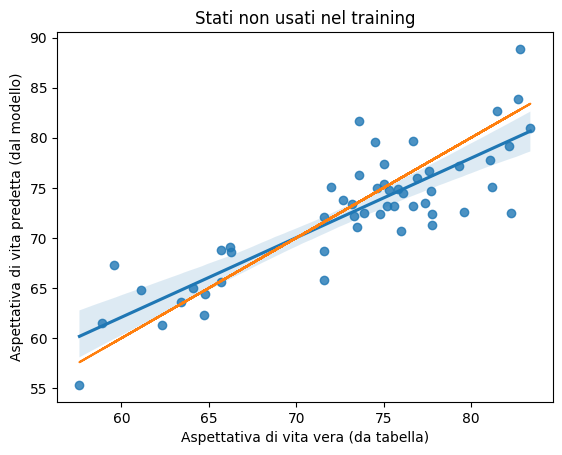

In [23]:
#qui do i comandi per fare il grafico (plt somiglia all'inglese plot, cioè graficare)
sns.regplot(x=y_test, y=y_pred).set(title='Stati non usati nel training')
plt.plot(y_test, y_test)
ax = plt.gca()
ax.set_xlabel("Aspettativa di vita vera (da tabella)")
ax.set_ylabel("Aspettativa di vita predetta (dal modello)");

La precisione (cioè quanto i punti stanno vicini alla diagonale) è simile a quella che c'è negli stati usati per il training e questo è un ottimo risultato!

Significa che possiamo usare questo modello per farci un'idea di cosa succederà anche in casi di cui non abbiamo la risposta (o per fare previsioni sull'impatto di decisioni come diminuire la spesa annuale per la sanità pubblica, o diminuire gli anni di scuola, o ridurre sensibilmente il numero di malati di HIV puntando sulla prevenzione ecc) e ... avere una certa fiducia che **in media** ci darà dei risultati sensati.

**Complimenti! Avete creato uno strumento che potrebbe essere molto utile nelle mani dei governanti dei paesi per capire su cosa puntare per migliorare l'aspettativa di vita dei propri abitanti!**

# Quali fattori contano di più?
Il valore dei pesi che il modello ha scelto ci aiuta acapire come e quanto ciascuna *feature* $x_i$ contribuisca a determinare il valore dell'aspettativa di vita $y$ secondo questo modello.

Quali delle nostre caratteristiche (le $x_i$) hanno più peso nel modello per predire l'aspettativa di vita? Ci basta vedere quanto valgono i pesi $w_i$ che corrispondono a quelle $x_i$: più un peso è grande e positivo, più influisce positivamente nell'aspettativa di vita, più un peso è grande e negativo più influisce negativamente nell'aspettativa di vita, mentre se il peso è piccolo vuol dire che quella variabile non ha molto a che fare con l'aspettativa di vita.

Guardiamoli insieme -> premete play:

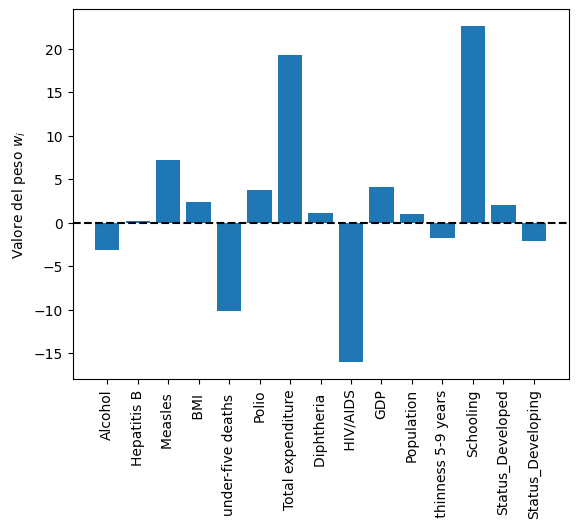

In [24]:
#qui do i comandi per fare il grafico (plt somiglia all'inglese plot, cioè graficare)
plt.bar(df.columns,model.coef_)
plt.axhline(linestyle='--', c='k')
plt.xticks(rotation=90);
plt.ylabel("Valore del peso $w_i$");

# Quiz



Il grafico ci comunica che le variabili che più aumentano l'aspettativa di vita media sono la spesa totale per la sanità e il livello di istruzione medio. E ci dice anche che una vasta presenza di HIV/AIDS e una mortalità infantile morto forte abbassano l'aspettativa di vita media. Sono risultati che più o meno a pelle ci aspettavamo.

Tuttavia, c'è qualcosa di strano: com'è possibile che la presenza di morbillo, poliomelite e difterite ("Measles", "Polio" e "Diphteria" in inglese) aumenti l'aspettativa di vita di una nazione? Pensateci insieme, trovate un aiuto nella cella qui sotto. Quali potrebbero essere le cause di questo strano risultato?

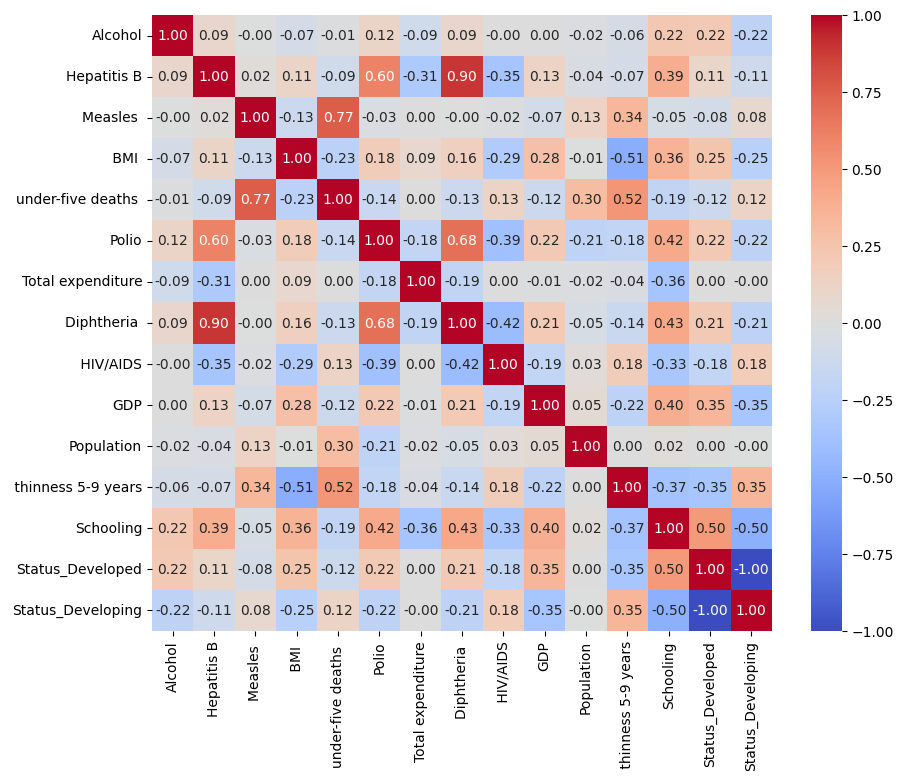

In [25]:
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size as needed
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()

Questo grafico, in maniera non troppo semplice, ci dà una spiegazione: ci spiega infatti quanto sono collegate tra loro le varie *features*. Più alto è il valore, quindi più rossa è una casella, più le due *features* associate a quella casella sono strettamente legate tra loro. Ovviamente, ogni *feature* è molto legata a se stessa, quindi la diagonale è molto rossa.

Una cosa interessante che possiamo notare, però, è che, osservando la riga della scolarizzazione ("Schooling"), questa *feature* è legata in maniera abbastanza forte alla presenza di poliomielite e difterite.